![pokemon](../imgs/pokemon.jpg)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# from beakerx import *
warnings.filterwarnings('ignore')
%matplotlib inline
color = sns.color_palette()

Dataset used here is taken from kaggle datasets: https://www.kaggle.com/sekarmg/pokemon

In [2]:
data = pd.read_csv('data/pokemon/pokemon.csv')

In [3]:
data.head()

#           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False

In [4]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [279]:
data.shape

(800, 12)

In [190]:
data.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [191]:
data.nunique()

#             800
Name          799
Type 1         18
Type 2         18
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

### `lmplot()` and `regplot()`

We'll try to observe relationship between 2 continuous variables: Attack and Defense. We can also differentiate based on a categorical variable i.e. whether the pokemon is legendary or not. For this we can use `lmplot()` or `regplot()`

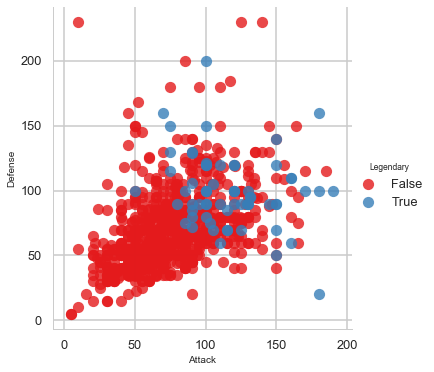

In [413]:
# plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.lmplot(
    x="Attack",
    y="Defense",
    data=data,
    fit_reg=False,
    hue='Legendary',
    palette="Set1")

**We can see clearly that legendary pokemons have both high defense and attack**

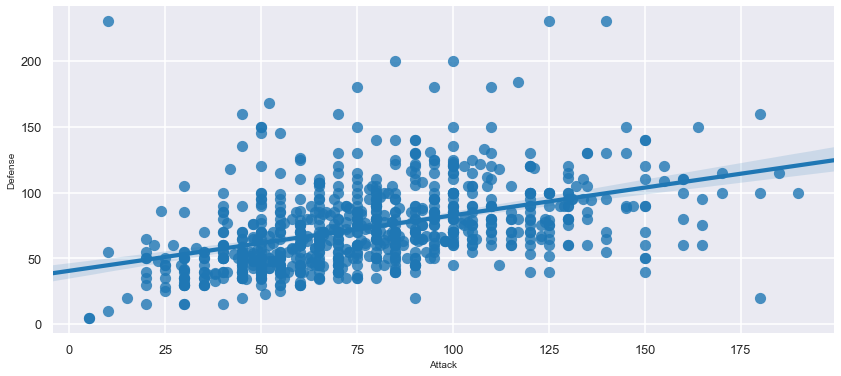

In [233]:
sns.set_style('darkgrid')  #changes the background of the plot
plt.figure(figsize=(14, 6))
sns.regplot(
    x="Attack", y="Defense", data=data,
    fit_reg=True)  #fit_Reg fits a regression line

**The relationship between Attack and Defense seems to be linear but their are few outliers too**

We can make faceted plots where we can segment plots based on another categorical variable: `Generation` in this case

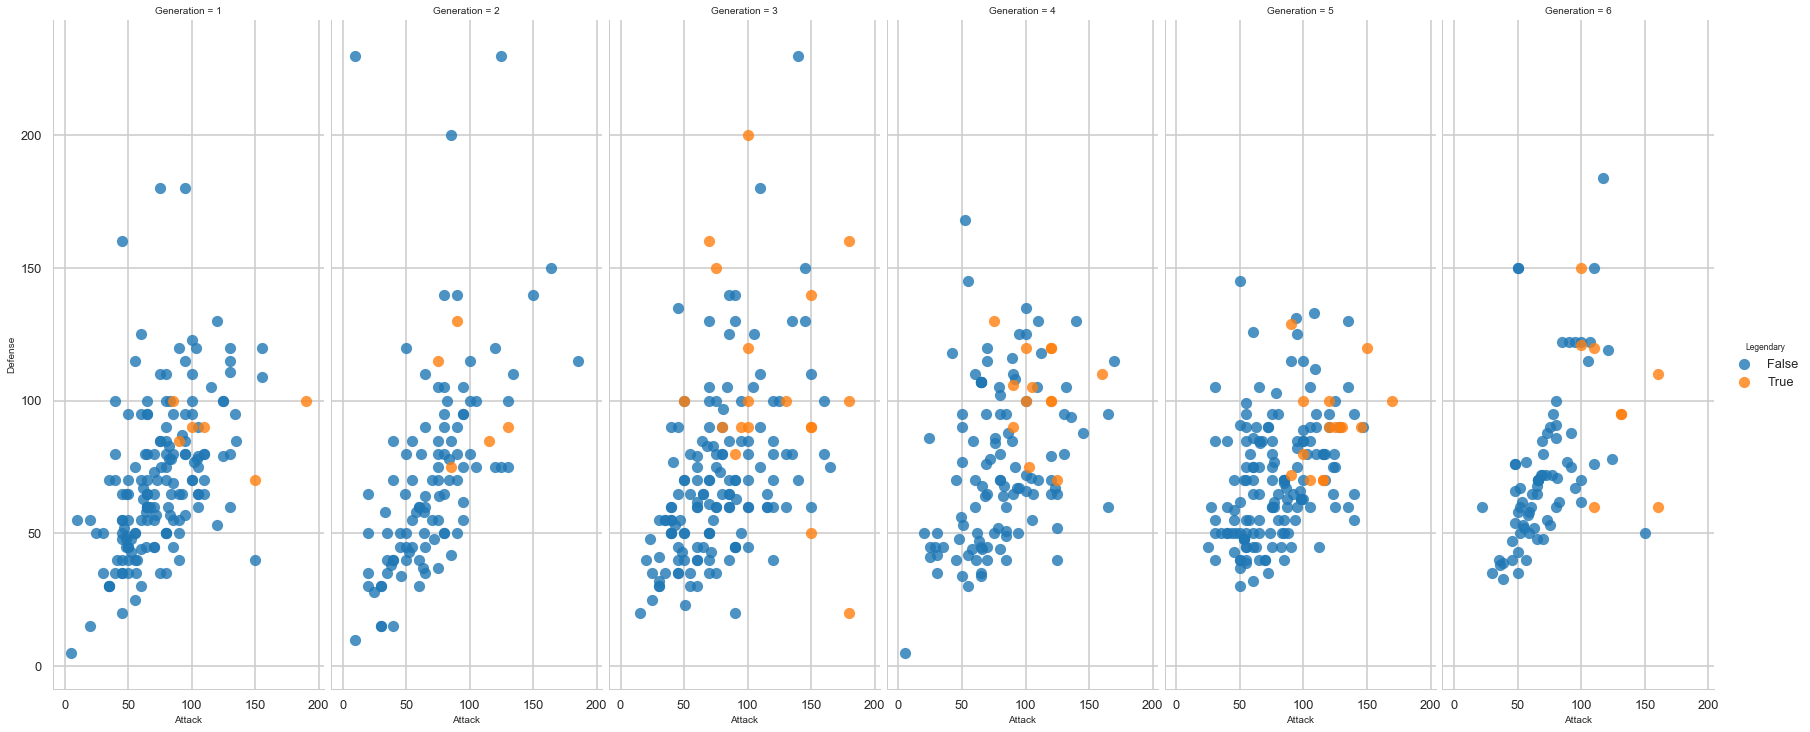

In [252]:
plt.figure(figsize=(20, 6))
sns.set_style('whitegrid')
sns.lmplot(
    x="Attack",
    y="Defense",
    data=data,
    fit_reg=False,
    hue='Legendary',
    col="Generation",
    aspect=0.4,
    size=10)

We can also see plot a continous variable against a categorical column. Below we're trying to see relationship between `Speed` and `Legendary` status

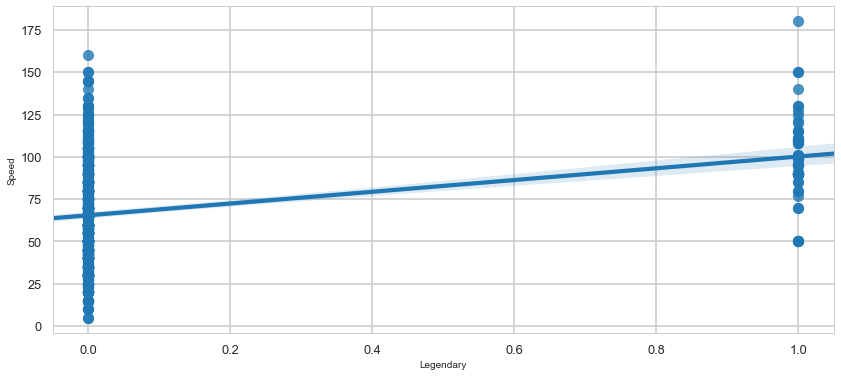

In [238]:
plt.figure(figsize=(14, 6))
sns.set_style('whitegrid')
sns.regplot(x="Legendary", y="Speed", data=data)

One issue with this plot is we cannot see the distribution at each value of speed as the points are overlapping. This can be fixed by an option called `jitter`

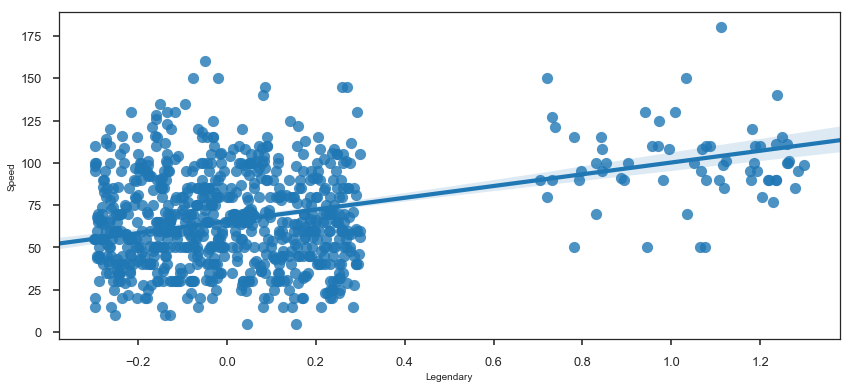

In [344]:
plt.figure(figsize=(14, 6))
sns.set_style("ticks")
sns.regplot(x="Legendary", y="Speed", data=data, x_jitter=0.3)

We can also fit a logistic relationship

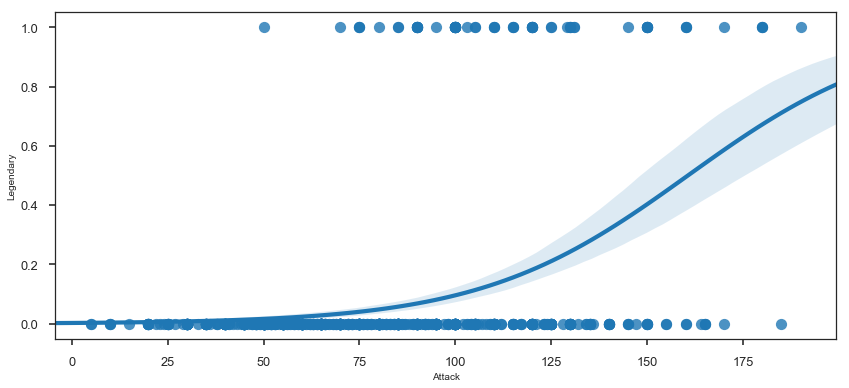

In [253]:
plt.figure(figsize=(14, 6))
sns.set_style("ticks")
sns.regplot(x="Attack", y="Legendary", data=data, logistic=True)

### `distplot()` and `kdeplot()`

These series of plots are good for observing distributions of variables

Text(0.5,1,'Attack')

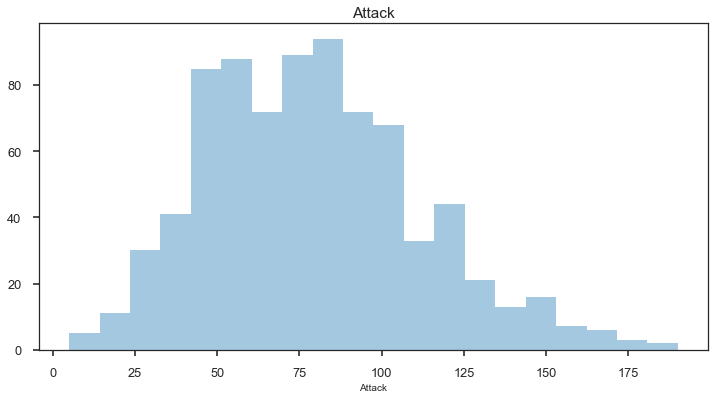

In [347]:
plt.figure(figsize=(12, 6))
ax = sns.distplot(data['Attack'], kde=False)
ax.set_title('Attack')

Distribution of `Attack` seems to be close to normal

`kde = True` option tries to estimate the density based on gaussian kernel

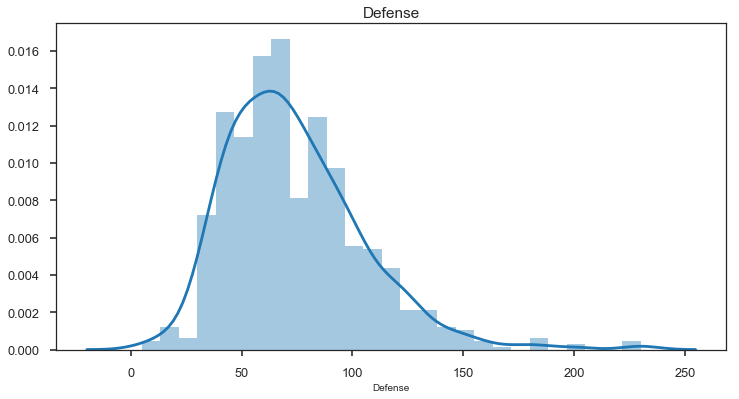

In [346]:
plt.figure(figsize=(12, 6))
ax = sns.distplot(
    data['Defense'], kde=True,
    norm_hist=False)  #norm_hist normalizes the count
ax.set_title('Defense')
plt.show()

`Defense` seems to have thinner tails and values are more centered around the mean

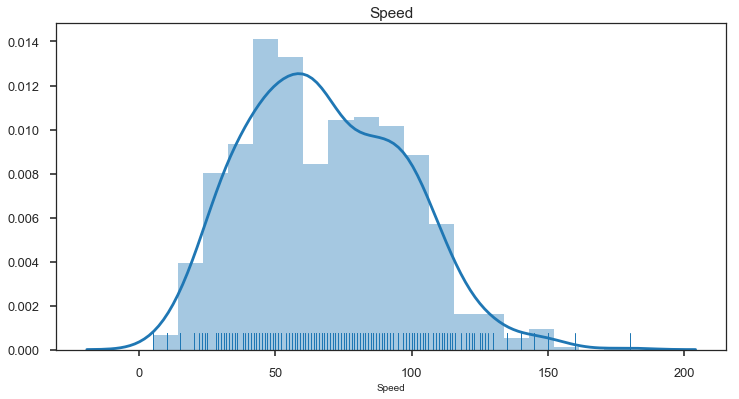

In [348]:
plt.figure(figsize=(12, 6))
ax = sns.distplot(data['Speed'], rug=True)
ax.set_title('Speed')
plt.show()

We can also just use `kdeplot()` if we are only interested in the density function

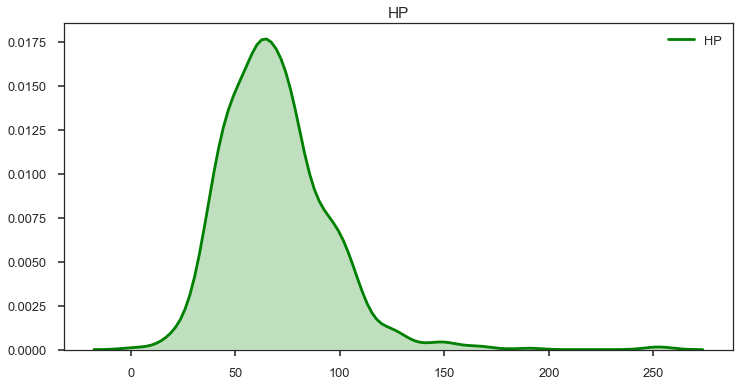

In [349]:
plt.figure(figsize=(12, 6))
ax = sns.kdeplot(data['HP'], shade=True, color='g')
ax.set_title('HP')
plt.show()

Other ways to visualize distributions are `striplot()` and `boxplot()`

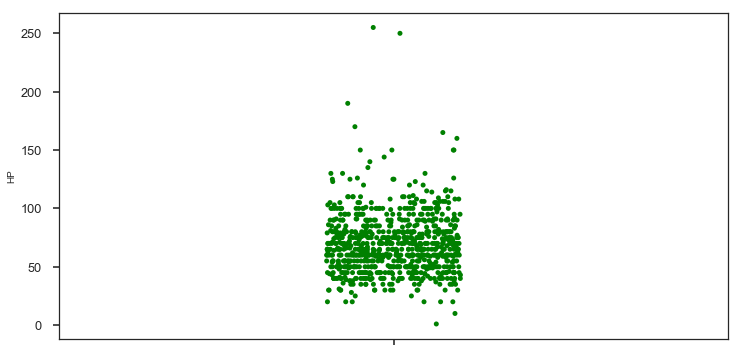

In [260]:
plt.figure(figsize=(12, 6))
sns.stripplot(
    y='HP', data=data, jitter=0.1,
    color='g')  #jitter option to spread the points

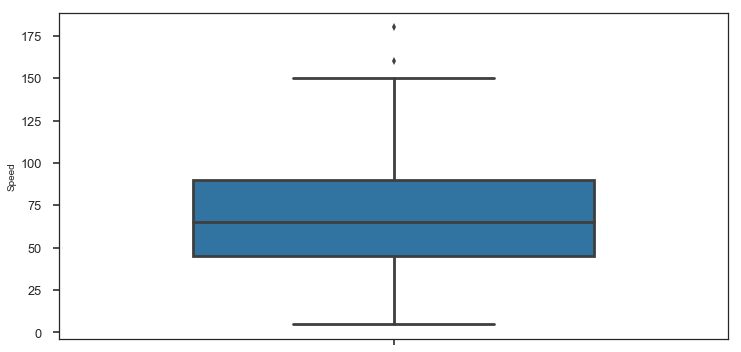

In [261]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='Speed', data=data, width=.6)

### `jointplot()`

Another way to make scatterplot is `jointplot()`

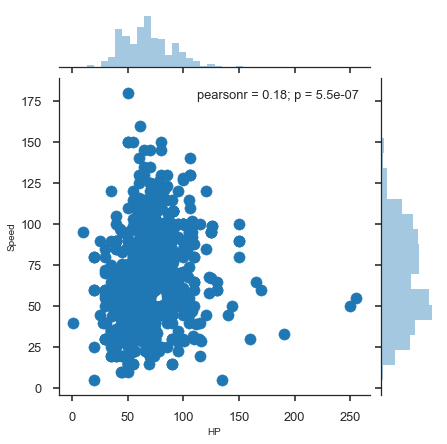

In [265]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='HP', y='Speed', data=data)

There are different varieties to the scatterplot

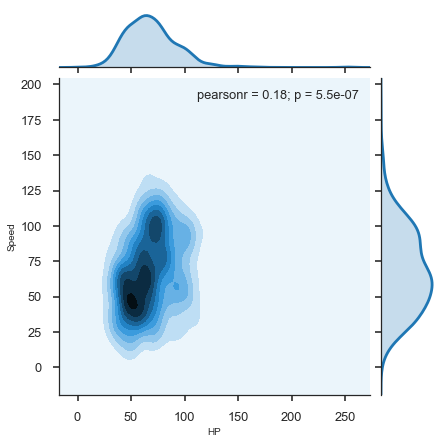

In [266]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='HP', y='Speed', data=data, kind='kde')

**In the above plot we can see 2 prominent regions of high density**

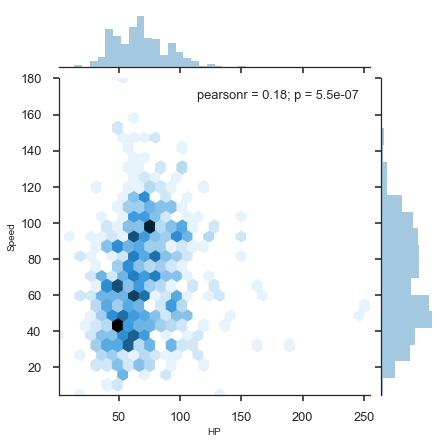

In [267]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='HP', y='Speed', data=data, kind='hex')

### `pairplot()`

To see relationships between all pairwise combination of variables, we can use `pairplot`

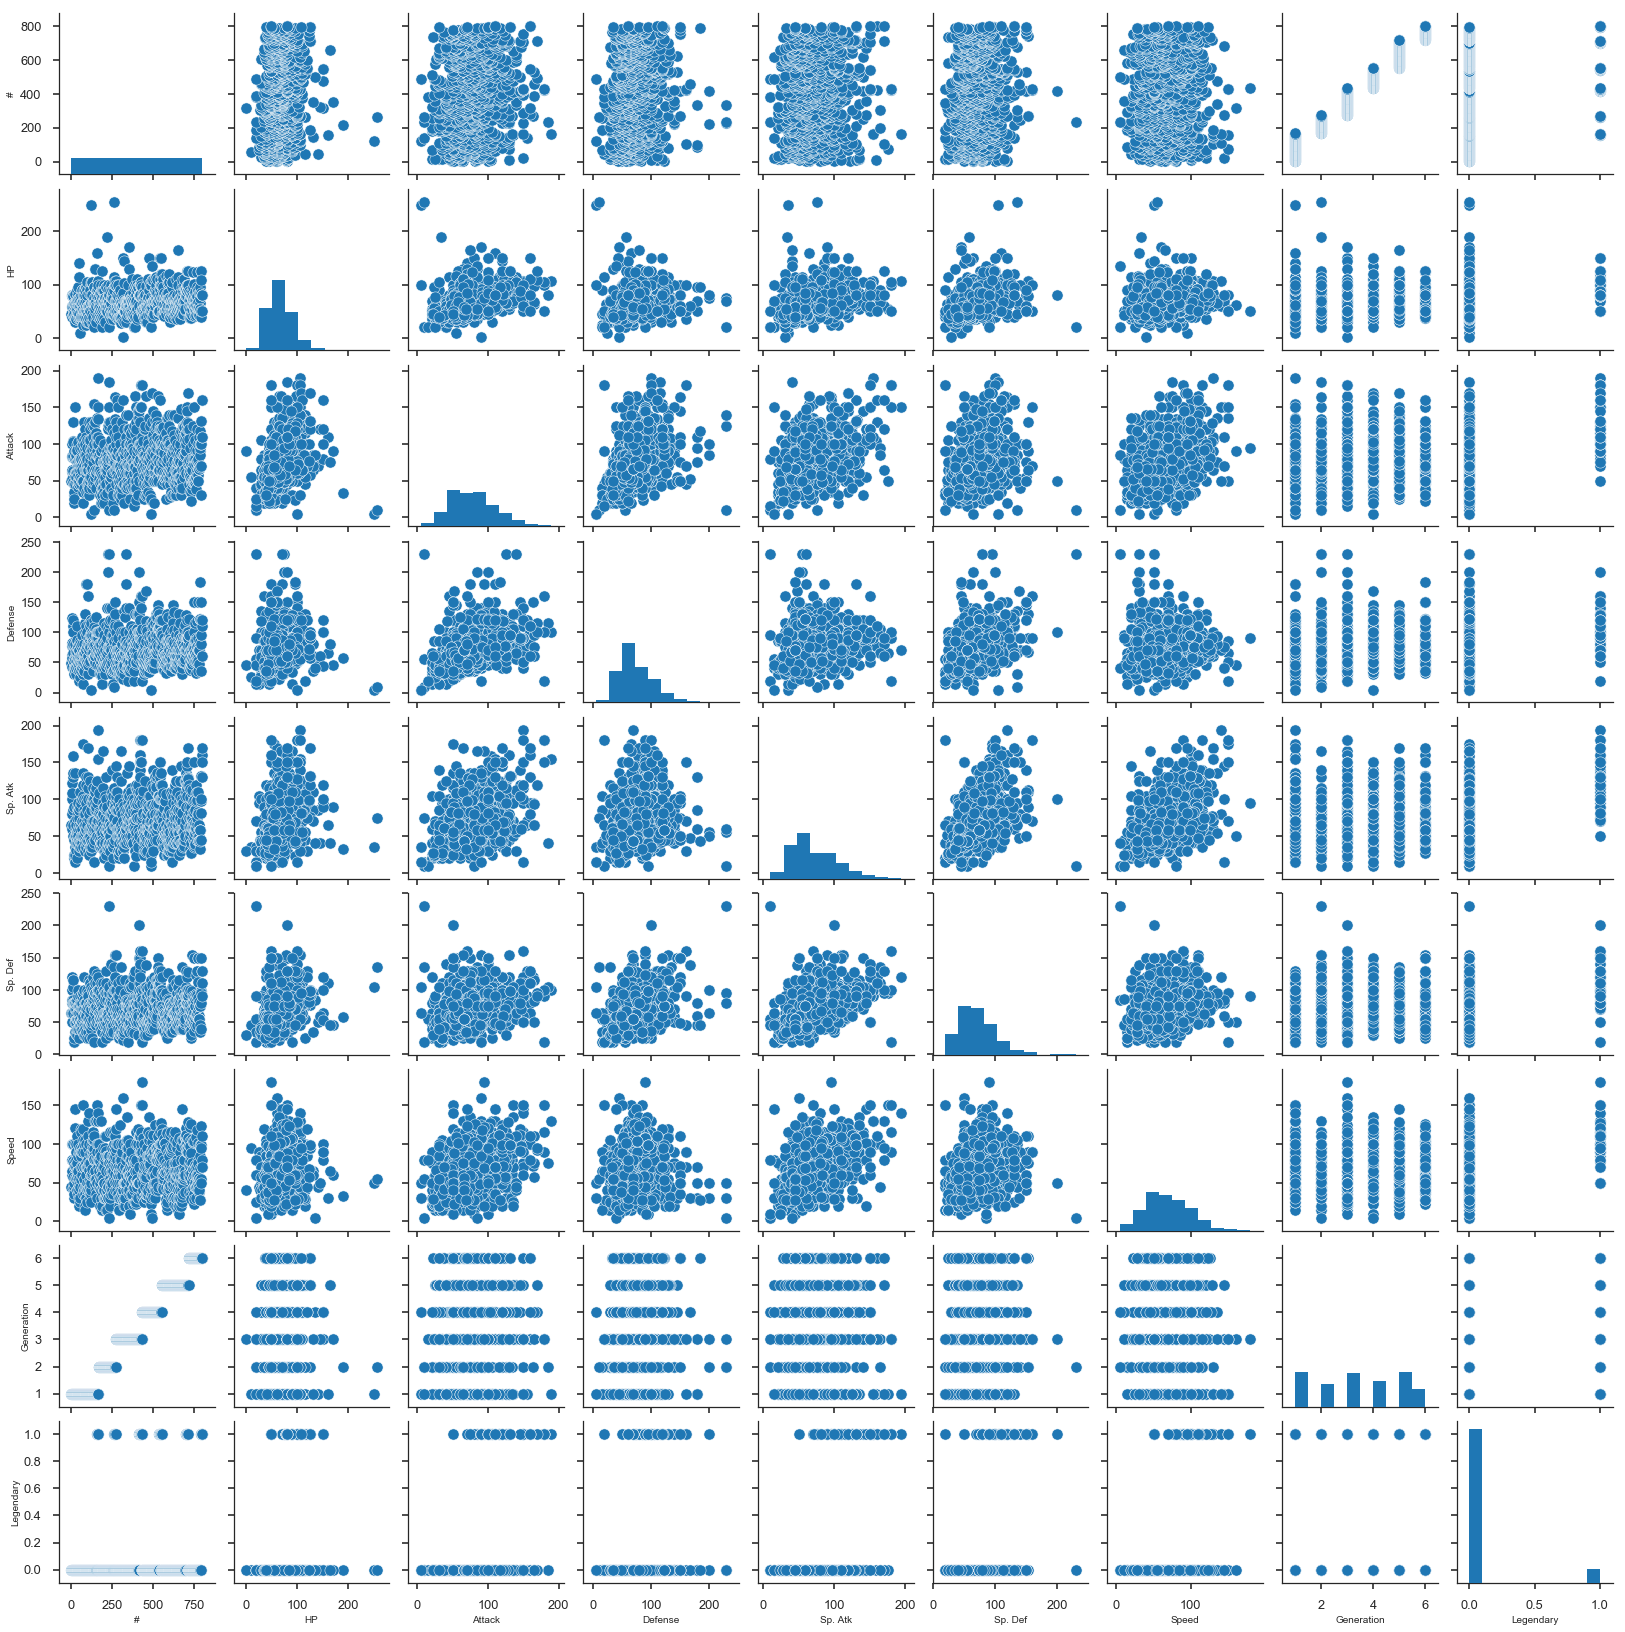

In [268]:
sns.pairplot(data)

We can also segment data based on another variable. In this case it is `Legendary`

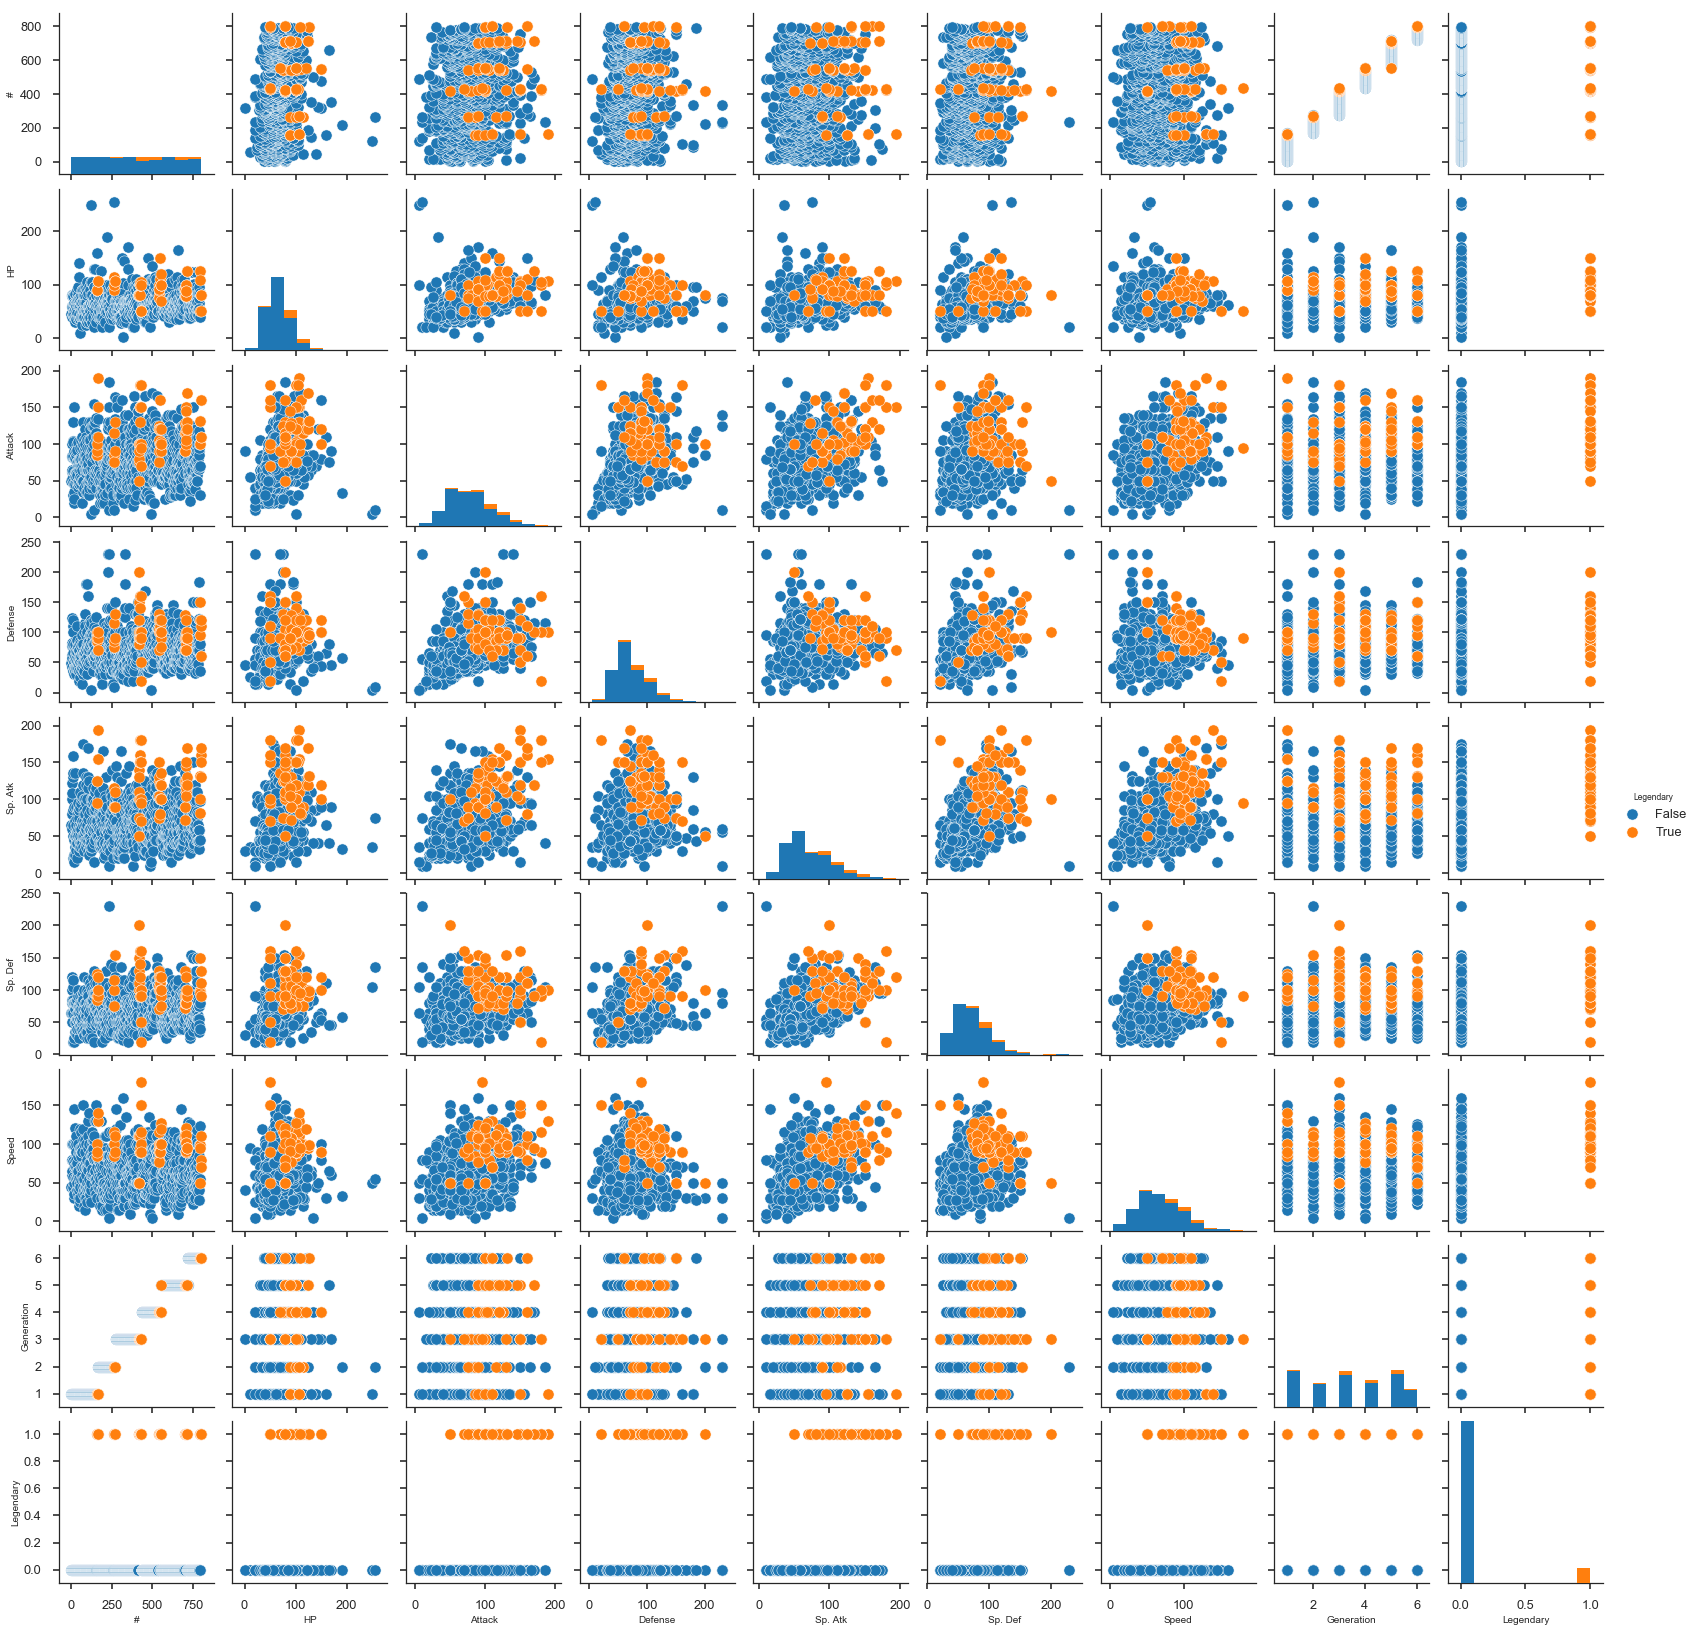

In [269]:
sns.pairplot(data, hue='Legendary')

Using `vars` option you can make pairplots for selected group of variables. Also on the diagnol you can see kde estimate of distribution

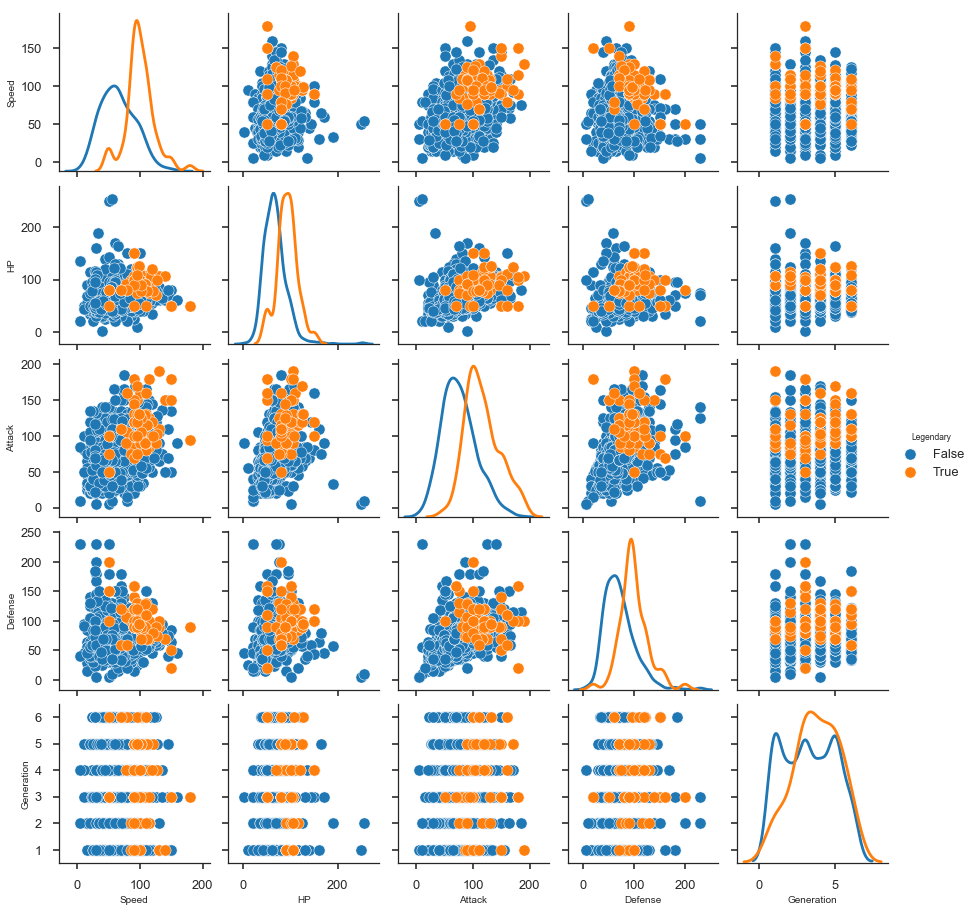

In [271]:
sns.pairplot(
    data,
    hue='Legendary',
    vars=['Speed', 'HP', 'Attack', 'Defense', 'Generation'],
    diag_kind='kde')

**Clearly attack and defense seems to be linearly related and legendary pokemons have stronger attributes**

Following series of plots are more used for analysis of categorical columns

### `countplot()`

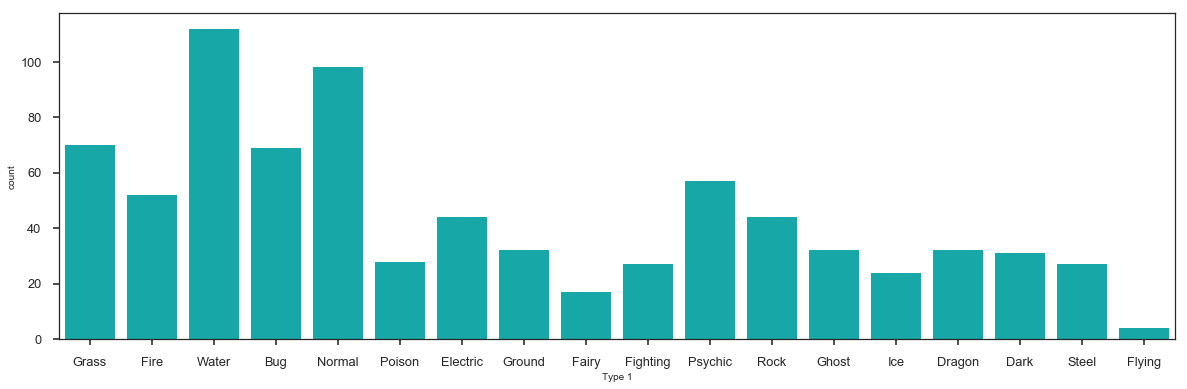

In [275]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(x="Type 1", data=data, color='c')

**We have maximum number of `water` pokemons and `flying` pokemons are the rare**

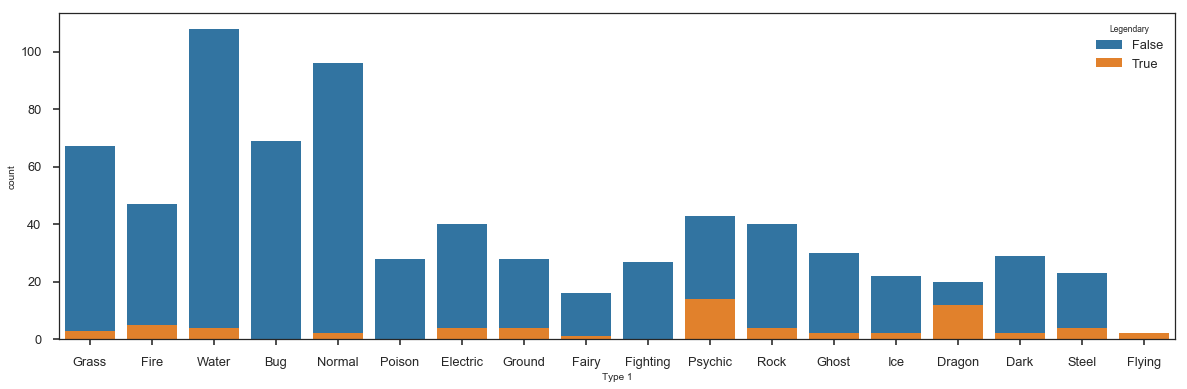

In [351]:
plt.figure(figsize=(20, 6))
sns.countplot(
    x="Type 1", data=data, hue='Legendary',
    dodge=False)  #dodge = False option is used to make stacked plots

`Psychic` and `dragon` pokemons have the highest number of `Legendary` pokemons

### `barplot()`

Barplot are used to aggregate a continuous variable based on a categorical column

In this plot, the value is average Speed by Type of the pokemon and the black line indicates the confidence interval

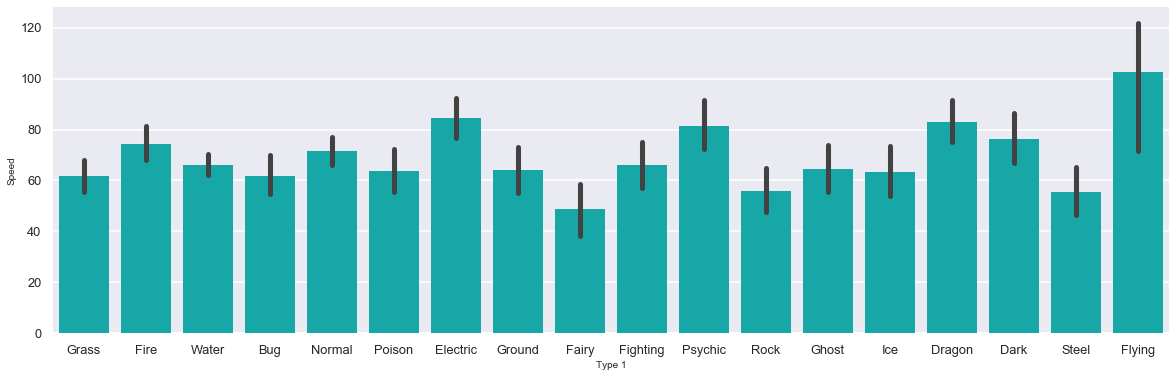

In [281]:
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.barplot(x="Type 1", y='Speed', data=data, color='c')

**Obviously `Flying` pokemons have the highest mean `Speed` but also high variability**

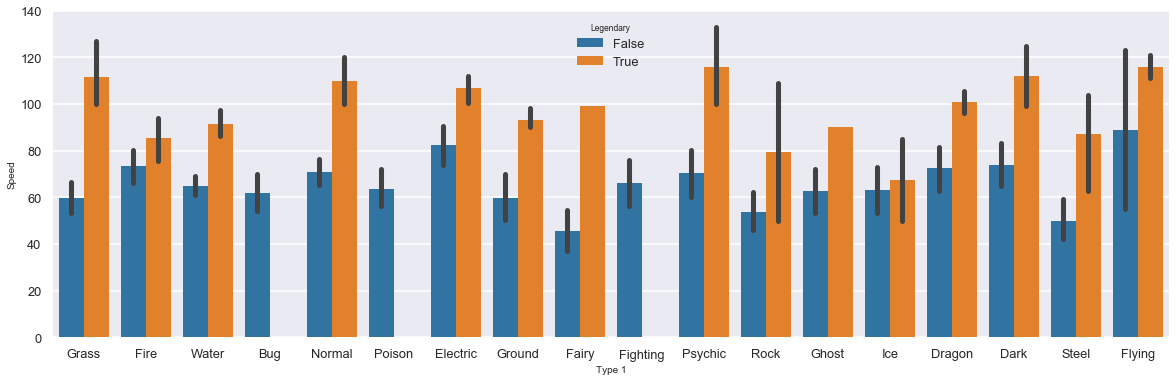

In [285]:
sns.set_style('darkgrid')
plt.figure(figsize=(20, 6))
sns.barplot(x="Type 1", y='Speed', data=data, hue='Legendary')

### `pointplot()`

Another way to display the same information as the previous plot is the pointplot

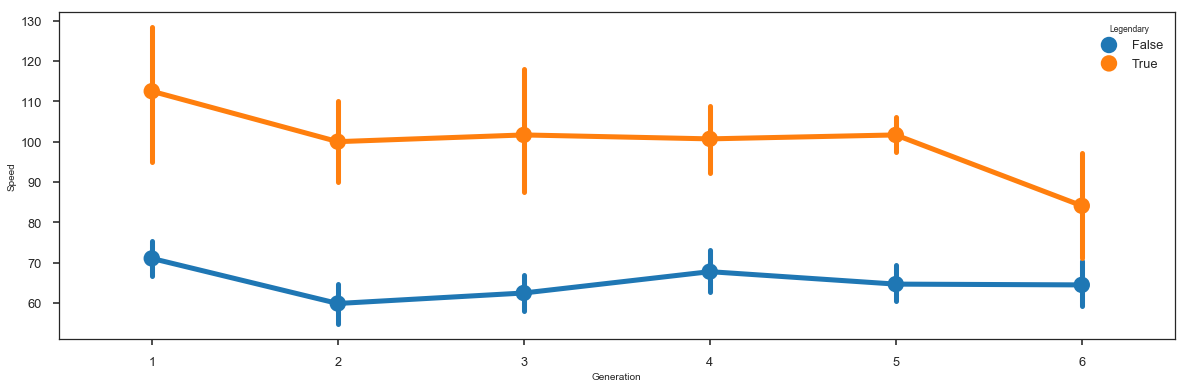

In [353]:
plt.figure(figsize=(20, 6))
sns.pointplot(x="Generation", y='Speed', data=data, hue='Legendary')

**Following series of plots are generally used to visualize distibution of a continuous variable within each category of a categorical variable**

### `striplot()`

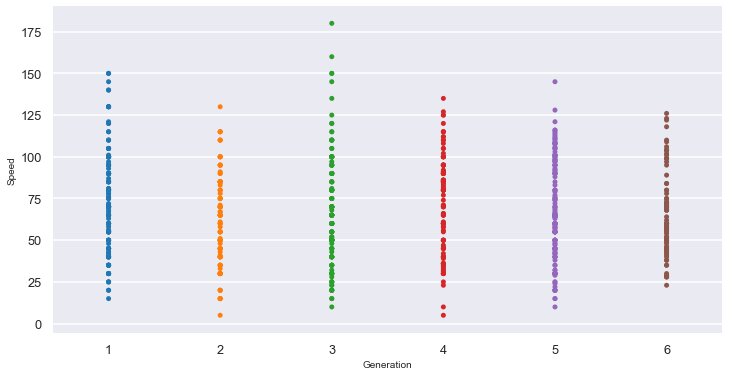

In [290]:
plt.figure(figsize=(12, 6))
sns.stripplot(x="Generation", y="Speed", data=data)

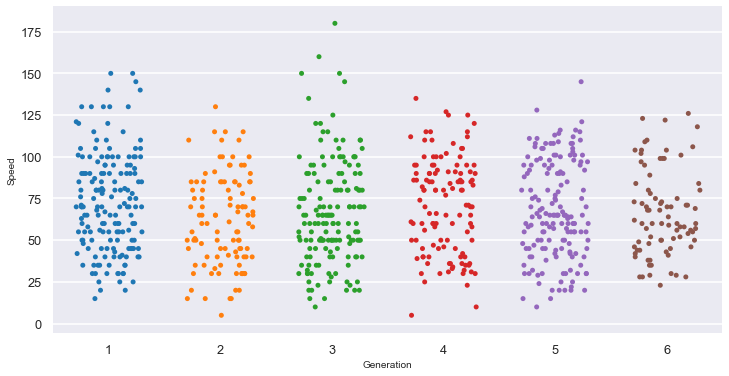

In [291]:
plt.figure(figsize=(12, 6))
sns.stripplot(x="Generation", y="Speed", data=data, jitter=0.3)

### `swarmplot()`

Swarmplot goes one step further by displaying all the points anf there is no overlap at all

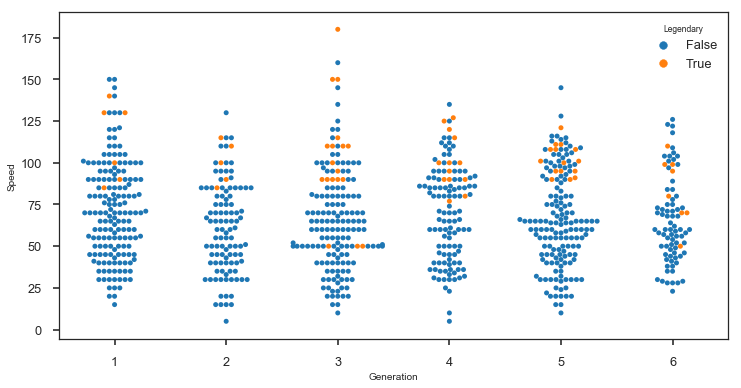

In [297]:
sns.set_style('ticks')
plt.figure(figsize=(12, 6))
sns.swarmplot(x="Generation", y="Speed", data=data, hue='Legendary')

### `boxplot()`

Good old boxplot to visualize `quantiles` and `outliers`

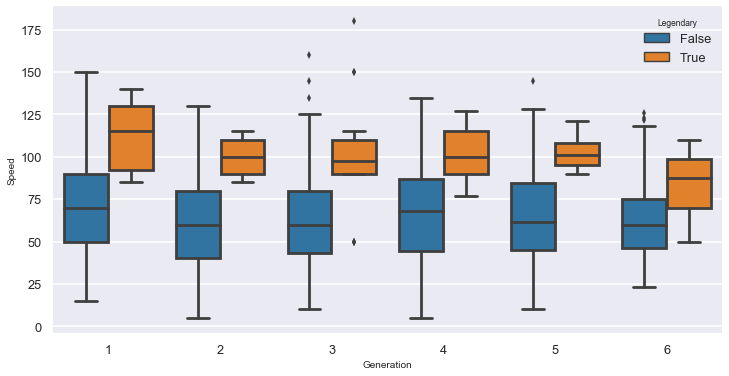

In [295]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Generation", y="Speed", data=data, hue='Legendary')

### `violinplot()`

One of the more interesting plots are the violinplots. Here you can see the quantiles as well as the distribution estimate using kde. This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth.

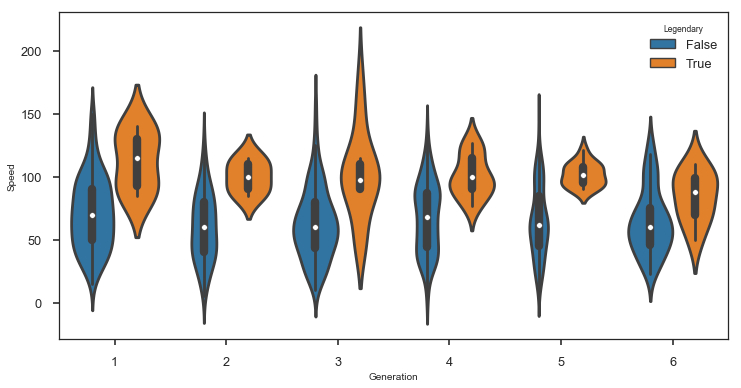

In [298]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="Generation", y="Speed", data=data, hue='Legendary')

Combining the violins

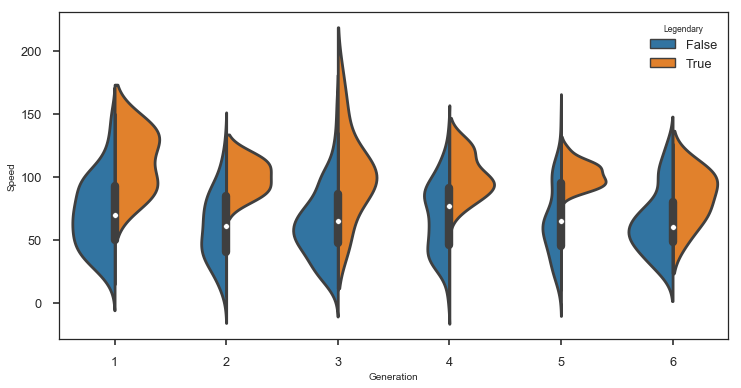

In [299]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    x="Generation", y="Speed", data=data, hue='Legendary', split=True)

If you pass `'count'` as `scale`, the width of the violin plot is based on the actual count in the bin

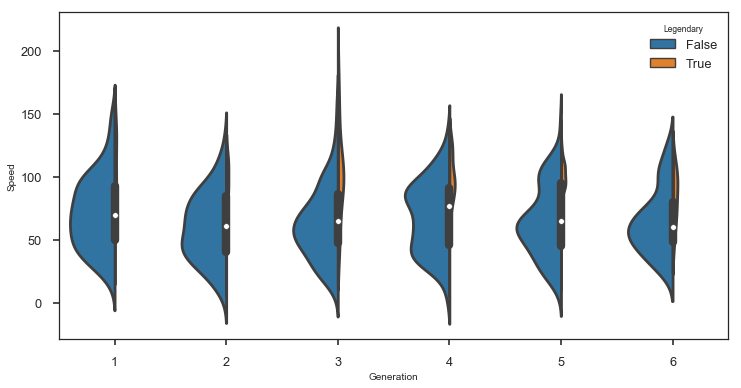

In [357]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    x="Generation",
    y="Speed",
    data=data,
    hue='Legendary',
    split=True,
    scale='count')

You can also visualize the quartiles also

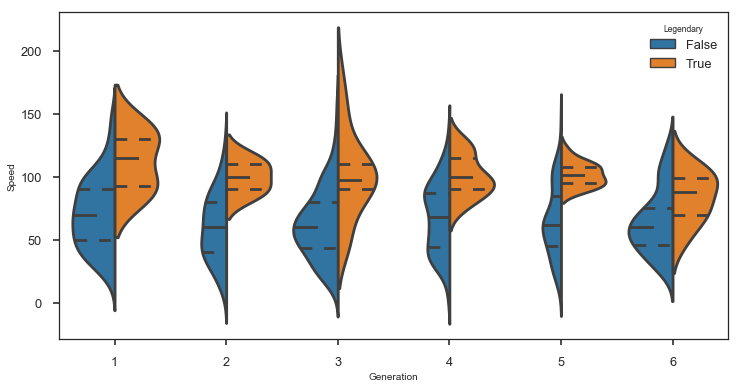

In [302]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    x="Generation",
    y="Speed",
    data=data,
    hue='Legendary',
    split=True,
    inner='quartile')

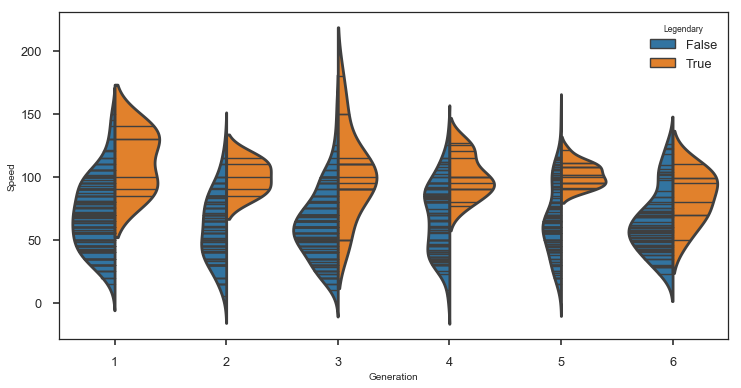

In [308]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    x="Generation",
    y="Speed",
    data=data,
    hue='Legendary',
    split=True,
    inner='stick') #show each datapoint

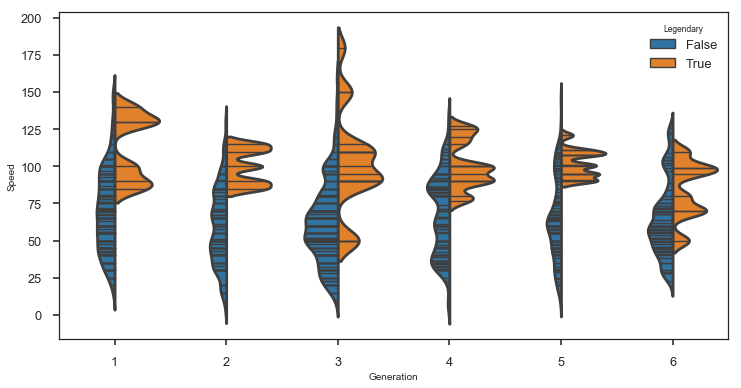

In [307]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    x="Generation",
    y="Speed",
    data=data,
    hue='Legendary',
    split=True,
    inner='stick',
    bw=.2)

**Following series of plots are used to show multiple plots in one grid**

### `pairgrid()`

Pairgrid is used for pairwise plots of y_vars and x_vars

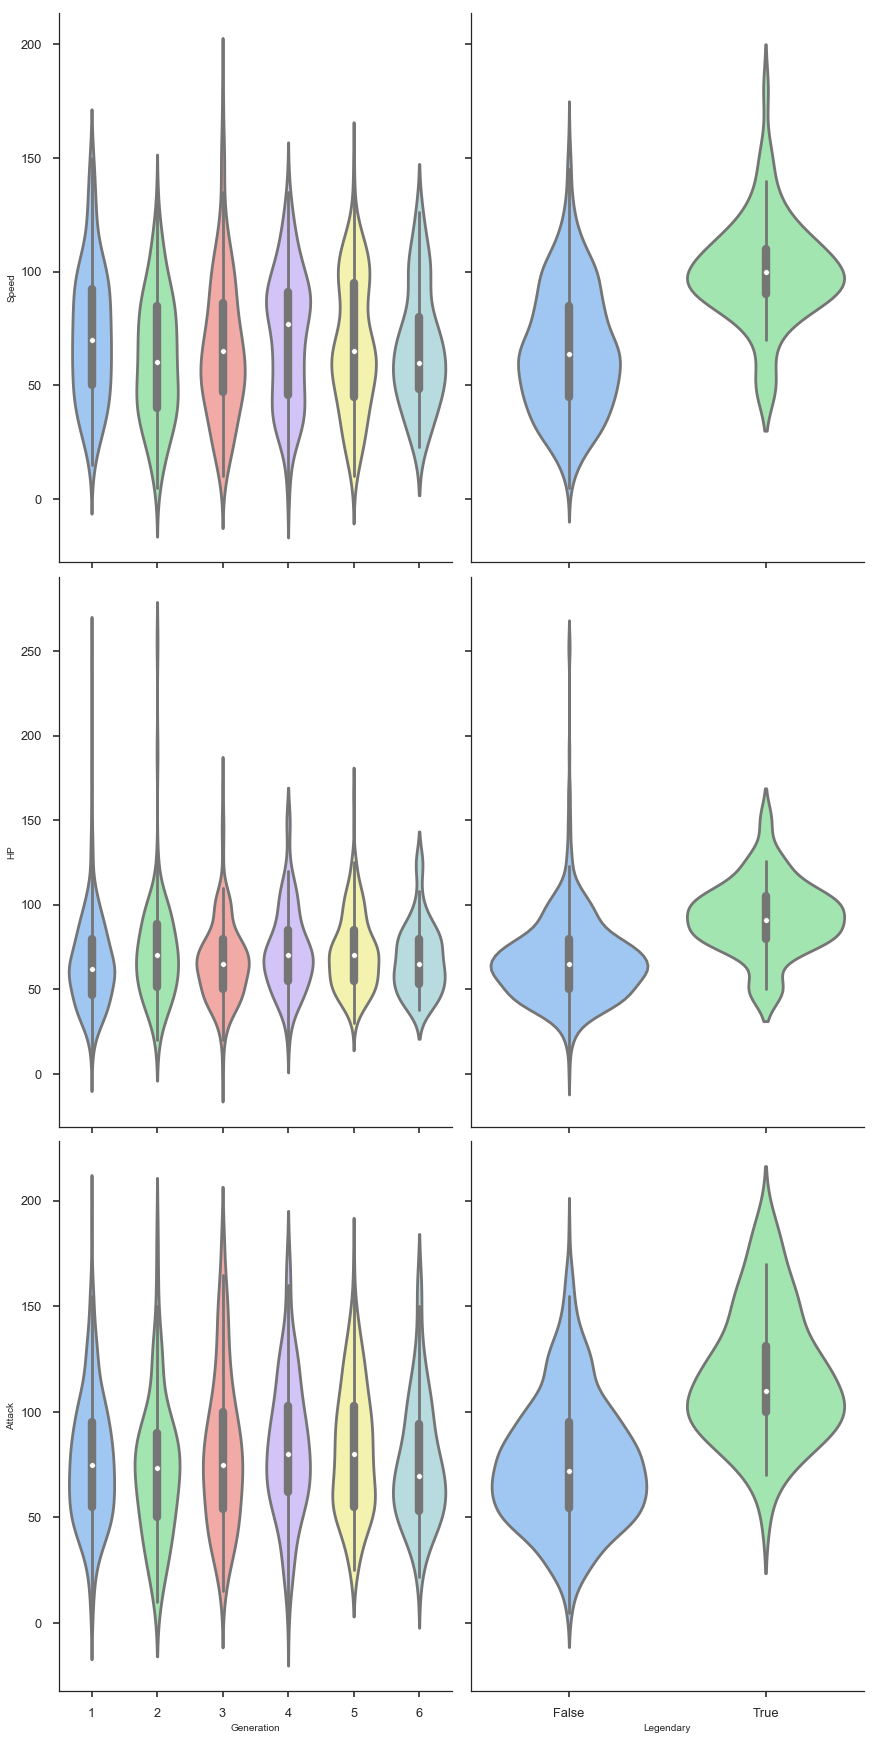

In [312]:
g = sns.PairGrid(
    data,
    x_vars=["Generation", "Legendary"],
    y_vars=["Speed", "HP", "Attack"],
    aspect=.75,
    size=8)
g.map(sns.violinplot, palette="pastel")

### `Facetgrid()`

Facetgrid is used to plot small multiples i.e separate plot for each category. Variables can be represented in `cols` or `rows` or `hue`

Only `cols`

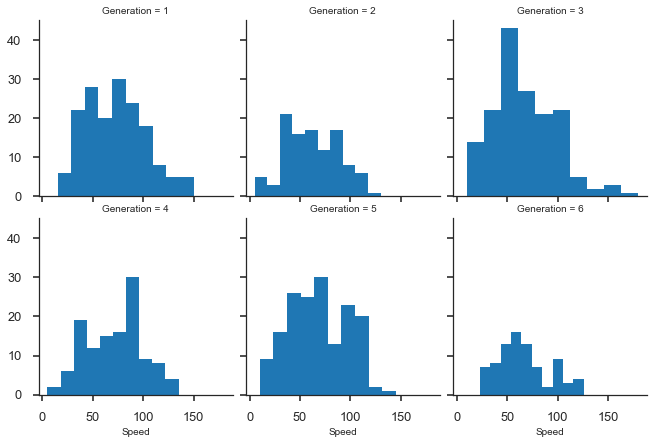

In [321]:
g = sns.FacetGrid(data=data, col='Generation', col_wrap=3)

g.map(plt.hist, "Speed")

`cols` + `hue`

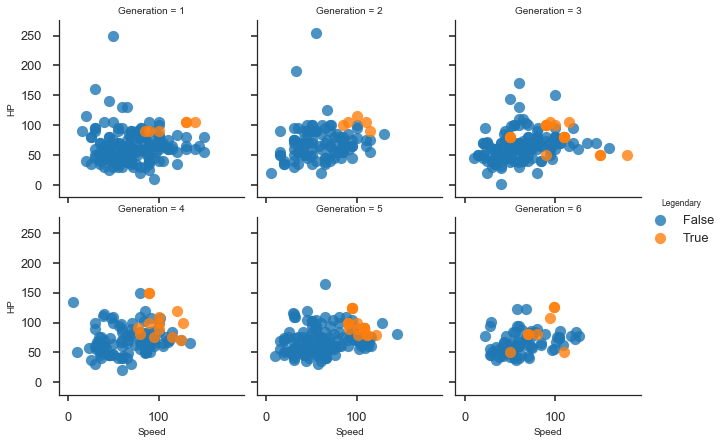

In [358]:
g = sns.FacetGrid(data=data, col='Generation', col_wrap=3, hue="Legendary")

g.map(sns.regplot, "Speed", "HP", fit_reg=False).add_legend()


`cols` + `rows`

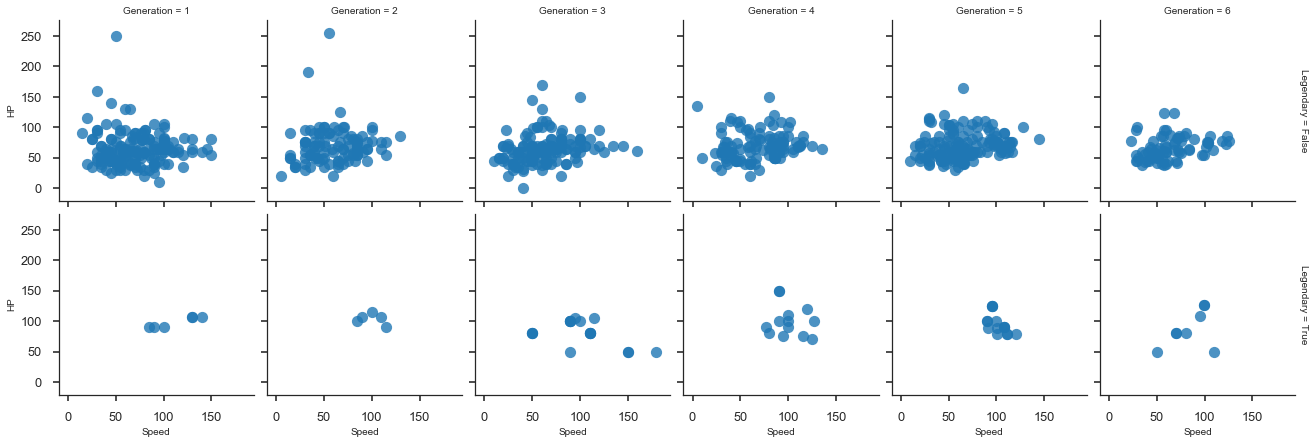

In [338]:
g = sns.FacetGrid(
    data=data, col='Generation', row='Legendary', margin_titles=True)

g.map(sns.regplot, "Speed", "HP", fit_reg=False)

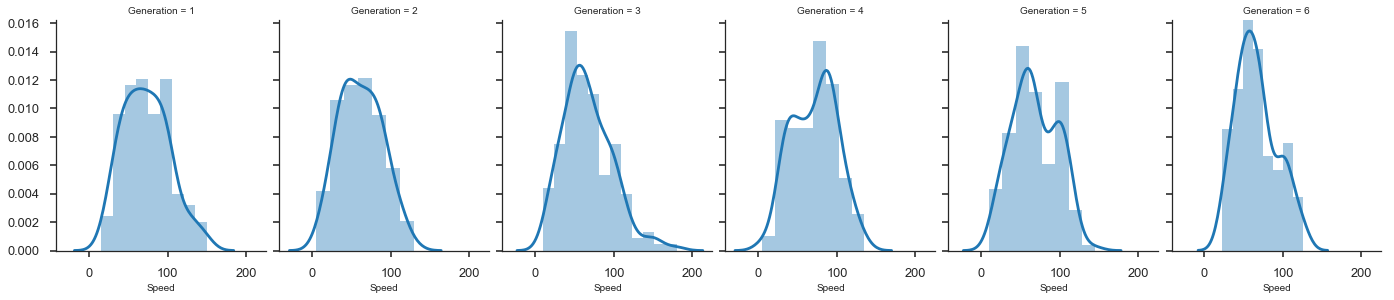

In [337]:
g = sns.FacetGrid(
    data=data, col='Generation', margin_titles=True, size=4, aspect=.8)

g.map(sns.distplot, "Speed")

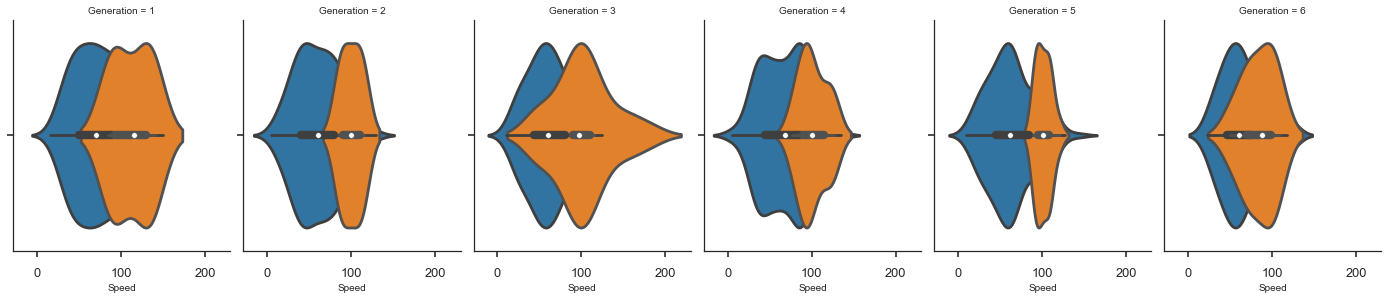

In [343]:
g = sns.FacetGrid(
    data=data,
    col='Generation',
    margin_titles=True,
    size=4,
    aspect=.8,
    hue='Legendary')

g.map(sns.violinplot, "Speed")

### Bubble chart

In [390]:
dragon = data.loc[data['Type 1']=='Dragon']

Mapping speed to the size of the bubble

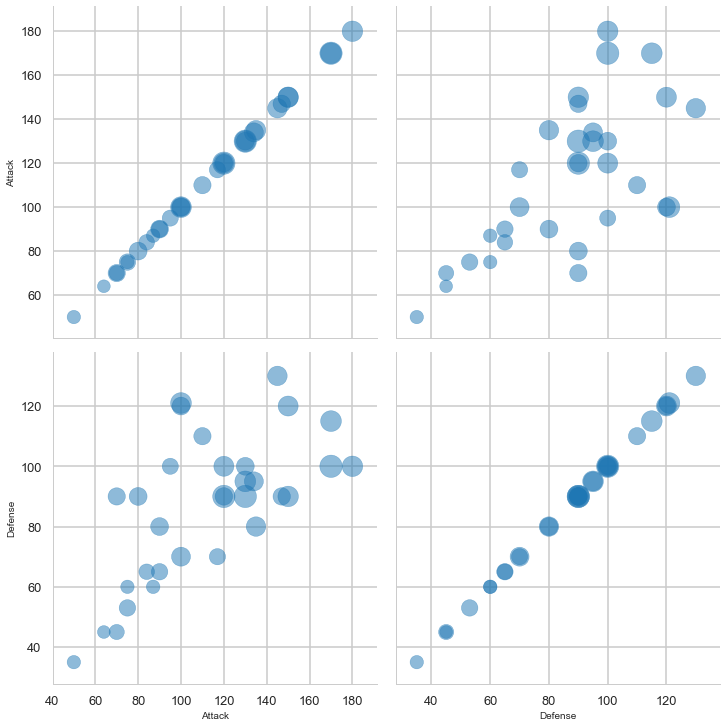

In [417]:
g = sns.PairGrid(
    dragon,
    vars=["Attack", "Defense"],
    size=5,
)
g.map(plt.scatter, s=4 * dragon.HP, alpha=.5)